In [138]:
"""
Author: InquisitorNova(Kaylen Smith Darnbrook)
Date: 12/12/2023
File_Name: Tropical_Cyclone_Preprocessing
Description:
"""
import numpy as np 
import scipy as sp 
import sklearn as sk
import matplotlib.pyplot as plt 
import pandas as pd 
import pytorch_lightning as pyl
import torch as tor 
import seaborn as sns
from skimage.transform import resize
from PIL import Image 
from tensorflow import keras
from tensorflow.keras import layers
from skimage.transform import resize
import tensorflow as tf
import skorch
import tables
import h5py
import pickle

In [3]:
Cyclone_images = np.load(r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\FIltered_Images\Filtered_Cyclone_Images.npy", allow_pickle = True)
Labels = np.load(r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\FIltered_Images\Filtered_Labels.npy", allow_pickle = True)

In [4]:
Cyclone_images = np.array([resize(x, (200,200)) for x in Cyclone_images])

c:\Users\kdarn\anaconda3\envs\NeuralNets\Lib\site-packages\skimage\transform\_warps.py:674: RuntimeWarning: All-NaN slice encountered
  min_val = min_func(input_image)
c:\Users\kdarn\anaconda3\envs\NeuralNets\Lib\site-packages\skimage\transform\_warps.py:678: RuntimeWarning: All-NaN slice encountered
  max_val = max_func(input_image)


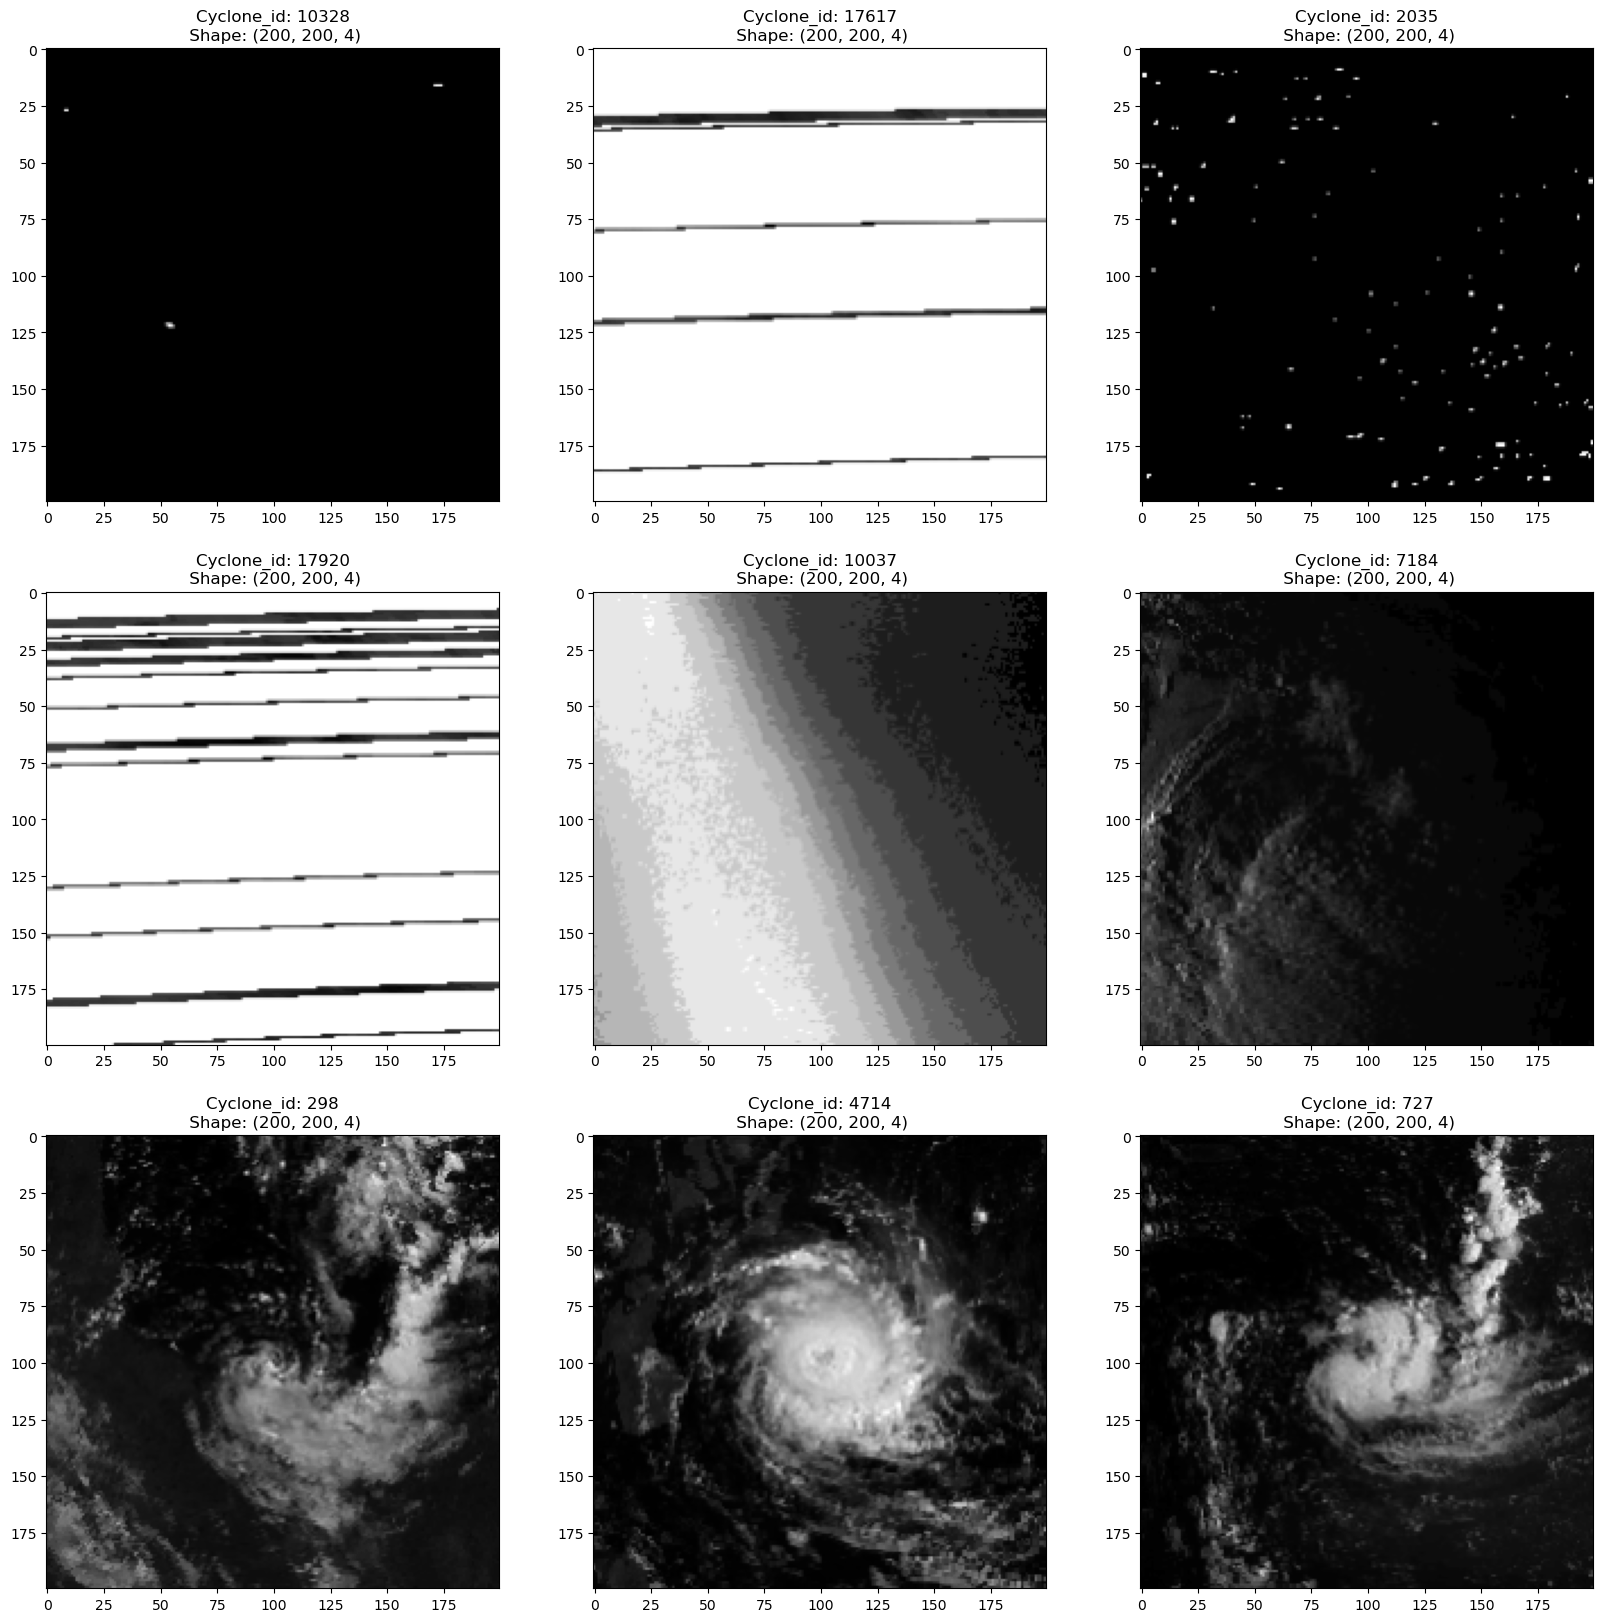

In [127]:
import random
def plot_random_cyclone(images, sample = 9):
    random_image_indexes = random.sample(list(np.arange(0, len(images), 1)), sample)
    if (np.sqrt(sample) - int(np.sqrt(sample))) == 0:
        sqrt = int(np.sqrt(sample))
        Length, width = sqrt,sqrt
    else:
        Length, width = 1, sample
    fig = plt.figure(figsize = (20,20))
    for index, values in enumerate(random_image_indexes):
        plt.subplot(Length, width, index+1)
        plt.imshow(images[values, :, :, 2], cmap = "gray")
        plt.title(f"Cyclone_id: {random_image_indexes[index]}\n Shape: {images[values].shape}")
plot_random_cyclone(Cyclone_images, sample = 9)

In [128]:
True_Cyclones_Ids = [17459, 3020, 16875, 15767, 14021, 17445, 5740, 10272, 4079, 12756, \
                     15904, 14978, 9654, 10805, 5736, 16617, 16746, 1927, 5207, 7284, \
                     15944, 19490, 14930, 10233, 13211, 13211, 7165, 1818, 3405, 1076, \
                     7796, 10768, 6821, 15222, 1350, 14629, 11, 4654, 12445, 16498, \
                     5883, 12331, 12985, 15870, 4432, 10558, 1497, 15405, 18124, 10059, \
                     13902, 16670, 141, 9779, 1152, 19256, 10220, 13613, 15528, 6150, 7522, \
                     18288, 15128, 2154, 2792, 9089, 14735, 9167, 9627, 19798, 13560, 16531, \
                     15487, 5555, 9184, 16678, 16805, 9942, 9956, 9552, 9391, 809, 10691, 11745, \
                     6118, 12719, 10095, 14848, 2840, 13794, 2840, 13794, 4579, 15048, 2180, 19212, \
                     4737, 5857, 1205, 3145, 12726, 359, 12801, 10241, 5499, 9347, 5696, 9284, 9075, \
                     2470, 1859, 9830,  2296, 9928, 10267, 19190, 3599, 12928, 666, 19453, 5971, 10163, \
                     16468, 16054, 19080, 3668, 7484, 13053, 19200, 2946, 3997, 10313, 7851, 8140, 293, \
                     2775, 17381, 6681, 6748, 6680, 19239, 16121, 14105, 13632, 16100, 3008, 6430, 19787, 
                     19056, 7126, 5419, 2188, 3667, 5772, 19523, 2453, 5924, 12163, 6732, 3040, 15345,  \
                     9147, 15551, 12824, 994, 4454, 12330, 1539, 4486, 9100, 14758, 2795, 16522, 15367, \
                     4890, 2277, 13382, 2796, 19518, 19910, 6571, 5257, 500, 18, 4128, 12763, 10424, 328, \
                     5523, 10228, 4515, 13533, 17467, 5429, 569, 327, 3298, 11837, 15652, 10025, 19613, \
                     3626, 19022, 11124, 10114, 3000, 9178, 9188, 9617, 14237, 19756, 14078, 15884, 19080, \
                     17316, 3985, 12949, 5779, 3097, 4411, 12892, 6208, 6801, 5620, 5478, 16573, 19814, 11330, \
                     13876, 10577, 5982, 1167, 141, 18266, 10627, 19068, 19843, 16404, 5713, 11075, 14902, 4250, \
                     9242, 15891, 10206, 11892, 6456, 16651, 13200, 5058, 166]
len(True_Cyclones_Ids)

251

In [129]:
Fake_Cyclones_Ids = [3809, 3895, 1919, 6682, 3717, 7807, 3248, 5780, 13881, 959, 1434, \
                    8476, 18075, 16320, 8482, 12588, 12414, 18334, 8154, 46, 8034, 12850, \
                    1101, 18738, 11520, 11145, 17624, 3303, 18524,  8648, 11447, 1276, 17592, \
                    7771, 8762, 18942, 15112, 8556, 7929, 8155, 2404, 14700, 8677, 9060, 16098, \
                    17742, 18243, 17792, 7929, 18838, 5848, 2920, 7851, 8140, 761, 18582, 13531, \
                    12954, 6427, 11428, 8852, 13860, 2467, 13101, 12341, 4379, 18465, 12568, 268, \
                    4297, 8728, 17934, 17576, 14548, 4348, 13706, 7650, 18781, 8825,  13933, 14244, \
                    6285, 14175, 16582, 8849, 10696, 8403, 17089, 7785, 16582, 17089, 13399, 16495, 
                    15152, 18928, 1643, 16506, 18306, 17752, 2522, 1427, 15872, 4341, 18462, 13700, \
                    2283, 7510, 11546, 16169, 14830, 18390, 12930, 9158, 4891, 8668, 2389, 14279, \
                    3248, 8149, 12062, 5032, 17629, 17885, 16510, 12193, 1716, 14053, 8187, 8805, \
                    12143, 7767, 13867, 9964, 17890, 16457, 8077, 4010, 6415, 8063, 1881, 10321, 6248, \
                    8933,  17713, 14254, 8277, 18236, 18795, 17737, 8437, 12481, 2425, 7831, 16727, 7638, 
                    17339, 14181, 18344, 9497, 18314, 670, 19436, 18777, 13464, 7940, 4089, 2053, 11427, \
                    15680, 8982, 8383, 14118, 4558, 8985, 2602, 5386, 1106, 907, 4334, 16136, 11365, 13569, 
                    17695, 724, 4153, 12899, 12938, 11490, 18432, 10743, 18498, 12014, 1601, 2035,10037, 14016, 
                    17765, 12156, 11931, 12208, 8679, 18131, 6105, 17364, 10321, 6216, 13112, 1898, 18912, 
                    4368, 8885, 18565, 16595, 12968, 18282, 18875, 7770, 13905, 6301, 14637, 18304, 1475, 
                    8063, 7692, 6842, 16885, 7843, 3388, 8802, 919, 4992, 2431, 2170, 13894, 12955, 9065, 
                    11976, 18066, 11603, 5976, 2953, 8452, 11761, 18782, 10986, 15065, 11785, 8092, 4647, \
                    1267, 78]   
len(Fake_Cyclones_Ids)        

251

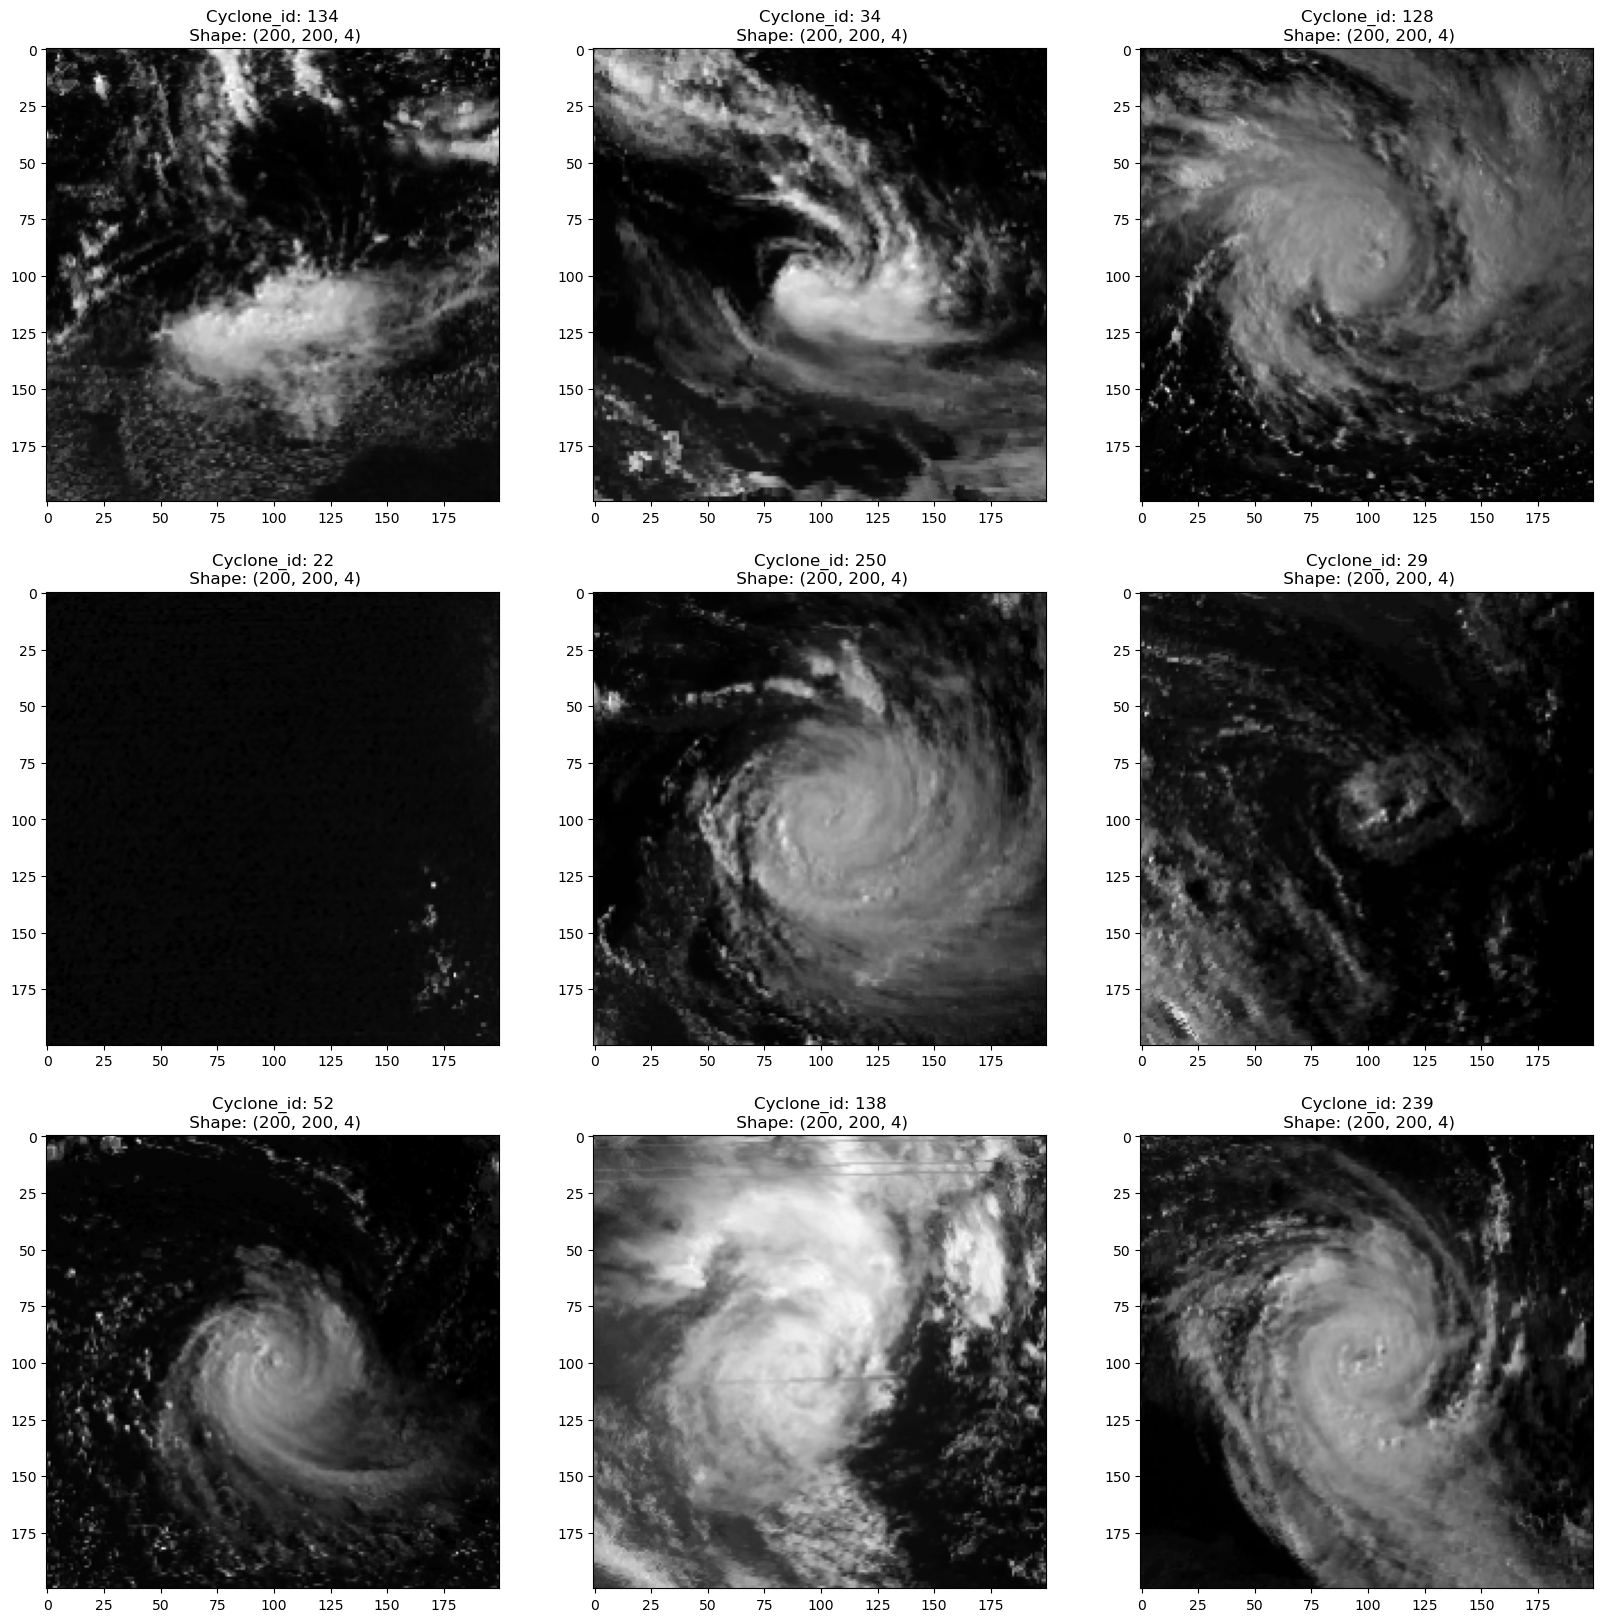

In [132]:
plot_random_cyclone(Cyclone_images[True_Cyclones_Ids], sample = 9)

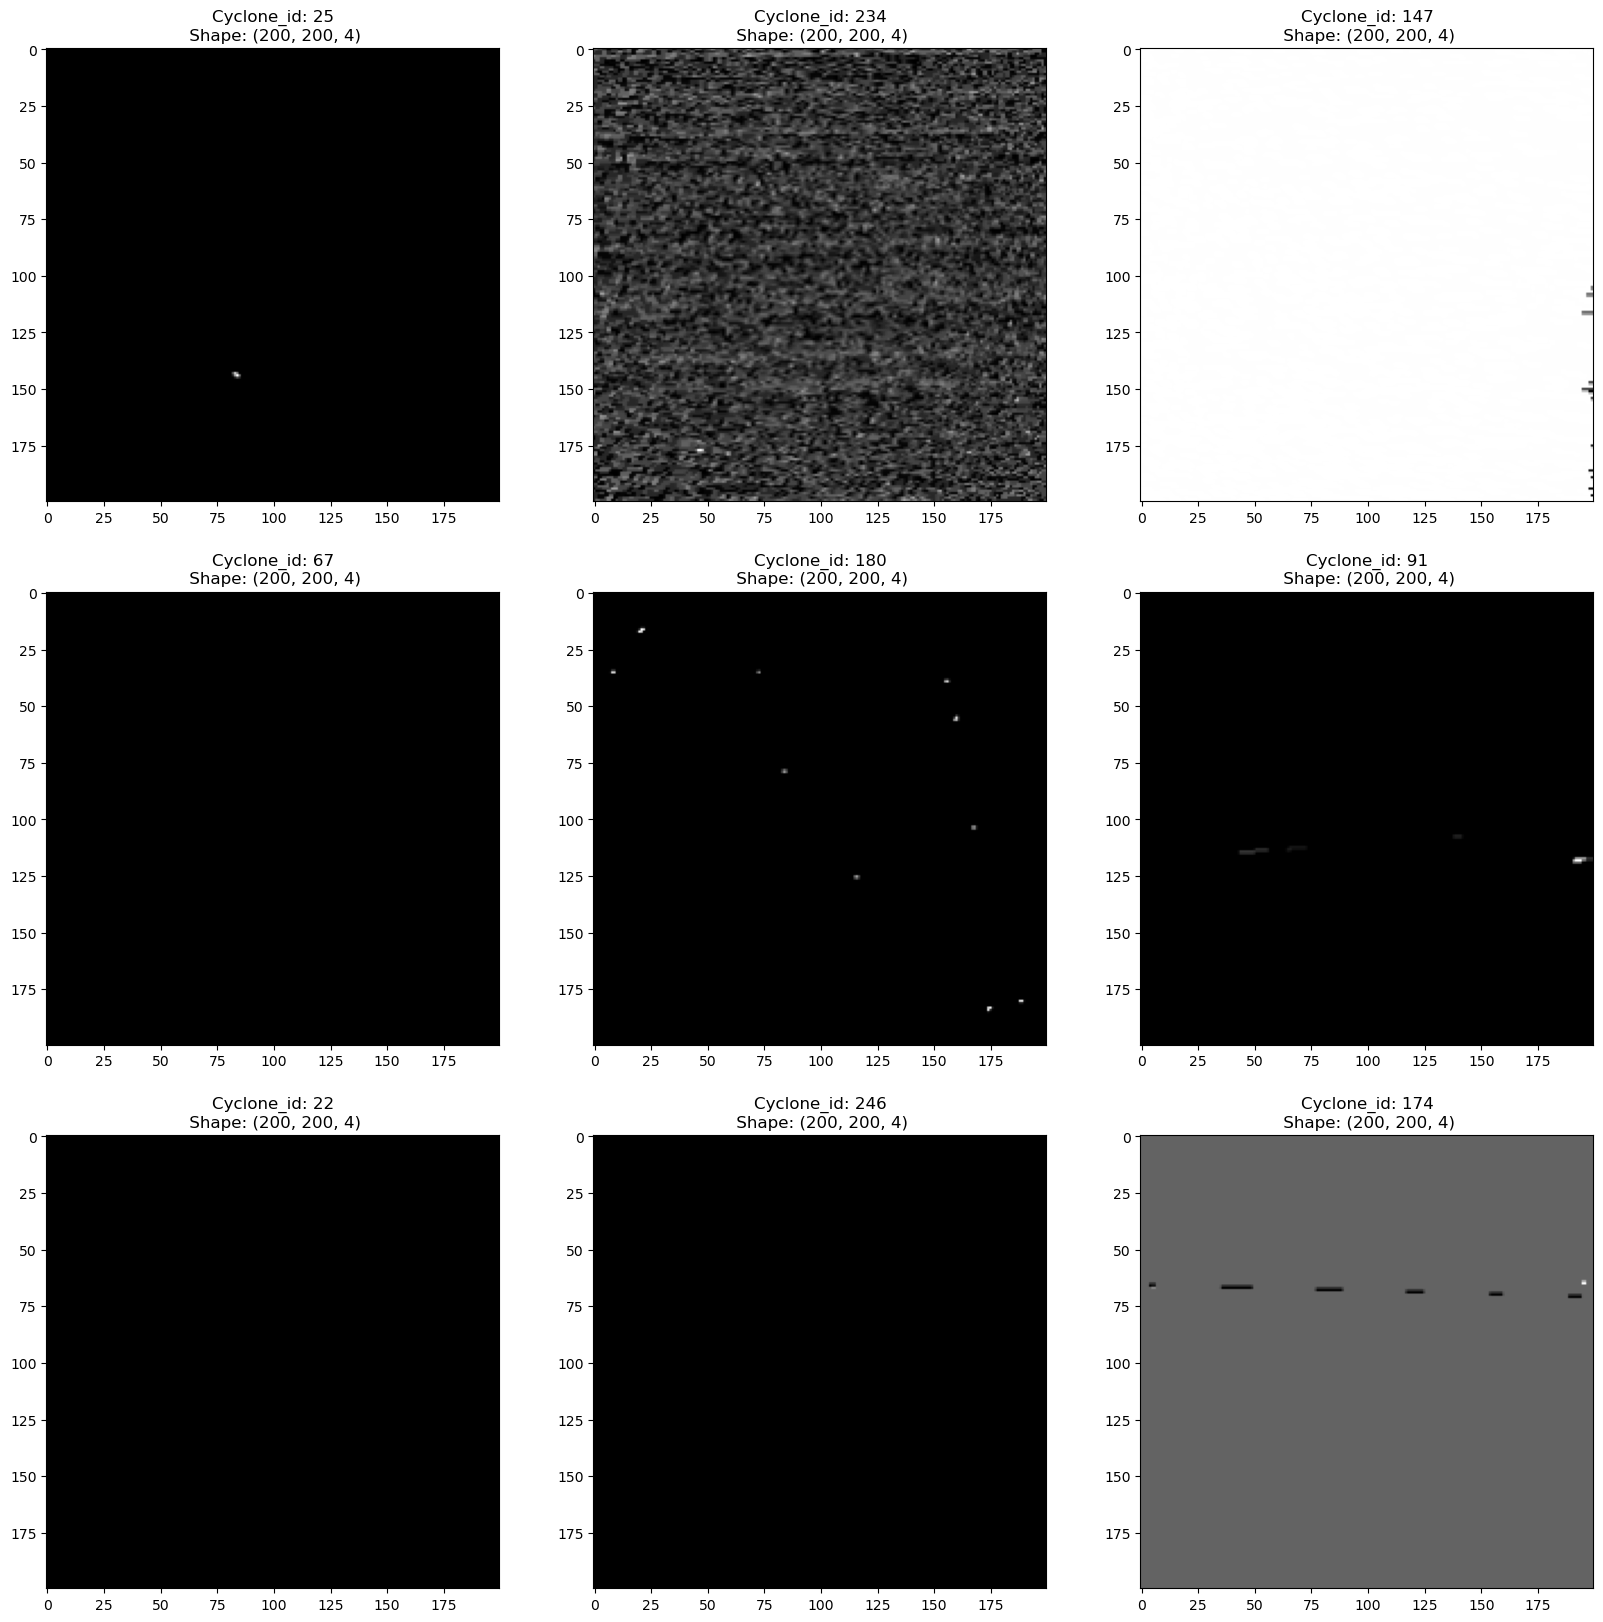

In [133]:
plot_random_cyclone(Cyclone_images[Fake_Cyclones_Ids], sample = 9)

In [148]:
X_Dataset = np.concatenate([Cyclone_images[True_Cyclones_Ids, :, :, 2], Cyclone_images[Fake_Cyclones_Ids,:, :, 2]])
X_Dataset.shape

(502, 200, 200)

In [149]:
Label_1 = np.ones(shape = (len(True_Cyclones_Ids,)))
Label_0 = np.zeros(shape = (len(Fake_Cyclones_Ids,)))
labels = np.concatenate([Label_1, Label_0])
labels.shape

(502,)

In [6]:
class SEblock(tf.keras.layers.Layer):
    def __init__(self,units, bottleneck_units):
        super().__init__()
        
        # Define the SE Block Layers:
        self.Dense = tf.keras.layers.Dense(units, kernel_initializer = "glorot_uniform", activation = "sigmoid")
        self.Global_Average_Pool = tf.keras.layers.GlobalAveragePooling2D()
        self.Bottleneck = tf.keras.layers.Dense(bottleneck_units, kernel_initializer = "he_normal", activation = "selu")
        self.Reshape = tf.keras.layers.Reshape((1,1,units))
        
    def call(self, x):
        x = self.Global_Average_Pool(x)
        x = self.Bottleneck(x)
        x = self.Dense(x)
        x = self.Reshape(x)
        return x

NameError: name 'tf' is not defined

In [7]:
class Residual_Block(tf.keras.layers.Layer):
    def __init__(self,filters, units, units_bottleneck):
        super().__init__()
        
        # Define Residual Block Layers
        self.Conv_1 = tf.keras.layers.Conv2D(filters = filters, kernel_size = (3,3), padding = "same", kernel_initializer= "he_normal")
        self.Conv_2 = tf.keras.layers.Conv2D(filters = filters, kernel_size = (3,3), padding = "same", kernel_initializer = "he_normal")
        #self.ffn_1 = tf.keras.layers.Dense(filters, activation = "selu", kernel_initializer = "lecun_normal", kernel_regularizer = "l1_l2")
        #self.ffn_2 = tf.keras.layers.Dense(filters, activation = "selu", kernel_initializer = "lecun_normal", kernel_regularizer = "l1_l2")
        self.Conv_Bypass = tf.keras.layers.Conv2D(filters = filters, kernel_size = (1,1), padding = "same", strides = 1, kernel_initializer = "he_normal")
        self.Leaky_Relu = tf.keras.layers.LeakyReLU()
        self.Max_Pooling = tf.keras.layers.MaxPool2D(2,2)
        self.Batch_Norm_1 = tf.keras.layers.BatchNormalization()
        self.Batch_Norm_2 = tf.keras.layers.BatchNormalization()
        self.Batch_Norm_3 = tf.keras.layers.BatchNormalization()
        self.Dropout_1 = tf.keras.layers.Dropout(0.3)
        self.Dropout_2 = tf.keras.layers.Dropout(0.3)
        self.Dropout_3 = tf.keras.layers.Dropout(0.3)
        self.Add_Layer = tf.keras.layers.Add()
        self.Multiply_Layer = tf.keras.layers.Multiply()
        self.SE_block = SEblock(units, units_bottleneck)
        
    def call(self, x):
        d = self.Conv_Bypass(x)
        d = self.Batch_Norm_1(d)
        
        x = self.Conv_1(x)
        x = self.Leaky_Relu(x)
        x = self.Batch_Norm_2(x)
        
        x = self.Conv_2(x)
        x = self.Batch_Norm_3(x)
        
        y = self.SE_block(x)
        y = self.Multiply_Layer([x,y])
        x = self.Add_Layer([y,d])
        
        x = self.Leaky_Relu(x)
        x = self.Max_Pooling(x)
        return x

NameError: name 'tf' is not defined

In [8]:
def RE_Net():
    inputs = tf.keras.layers.Input(shape = (200,200,1))
    x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = "same", kernel_initializer= "he_normal")(inputs)
    x = Residual_Block(filters = 32, units = 32, units_bottleneck = 4)(x)
    x = Residual_Block(filters = 64, units = 64, units_bottleneck = 16)(x)
    x = Residual_Block(filters = 128, units = 128, units_bottleneck = 32)(x)
    x = Residual_Block(filters = 128, units = 128, units_bottleneck = 32)(x)
    
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.Dense(100, activation = "gelu", kernel_initializer = "he_normal", kernel_regularizer = "l1_l2")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    out = tf.keras.layers.Dense(1, activation = "sigmoid", kernel_initializer = "glorot_uniform")(x)
    Model = tf.keras.Model(inputs = inputs, outputs = out)
    
    return Model
SE_Net = RE_Net()
print(SE_Net.summary())

NameError: name 'tf' is not defined

In [1]:
import os
lists = os.listdir(r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\Checkpoints")
path = r"C:\Users\kdarn\OneDrive\Documents\Life's Portfolio\Projects\Machine Learning Personal Projects\Cyclone Imaging\Checkpoints"

In [5]:
SE_Net.load_weights(path)

Predictions = SE_Net.predict(Cyclone_images[:,:,:,2].reshape(-1,200,200,1))
print(Predictions.shape)

mask = [bool(x) for x in np.round(Predictions).reshape(-1,)]
print(Cyclone_images[mask].shape)

np.save("FiltsCleaned_Images.npy", Cyclone_images[mask])
np.save("FiltsCleaned_Labels.npy", Labels[mask])

NameError: name 'SE_Net' is not defined